# Project Introduction

This project develops a machine learning model for sentiment analysis on movie reviews, aiming to classify reviews as positive or negative. The workflow includes:
- Data collection (real-world datasets like IMDb or Rotten Tomatoes)
- Text preprocessing (cleaning, normalization)
- Model training (Naive Bayes, easily extendable to Logistic Regression/SVM)
- Evaluation (accuracy, classification report)
- Prediction on new reviews

---
# Sentiment Analysis on Movie Reviews

This notebook demonstrates how to perform sentiment analysis on movie reviews using Python. We use a dataset of movie reviews, preprocess the text, train a sentiment analysis model, and test it on sample reviews.

## 1. Import Required Libraries

Let's import the necessary libraries for data processing, visualization, and machine learning.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## 2. Load Real-World Movie Reviews Data

To use real-world data, download a dataset (e.g., IMDb, Rotten Tomatoes, or Kaggle) and place the CSV file in your project directory. The file should have columns like 'review' and 'sentiment'.

Uncomment and edit the code in the next cell to load your real dataset. If your column names are different, update the rest of the notebook accordingly.

In [18]:
# Use a small sample dataset for development/testing
sample_data = {
    'review': [
        'I loved this movie, it was fantastic!',
        'Absolutely terrible. Waste of time.',
        'A wonderful experience, would watch again.',
        'Not my cup of tea. Pretty boring.',
        'Great acting and story!',
        'The plot was dull and predictable.'
    ],
    'sentiment': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(sample_data)
df.head()

,review,sentiment
0,"I loved this movie, it was fantastic!",1
1,Absolutely terrible. Waste of time.,0
2,"A wonderful experience, would watch again.",1
3,Not my cup of tea. Pretty boring.,0
4,Great acting and story!,1


## 3. Line Plot

Let's visualize the distribution of sentiments in our sample data using a line plot.

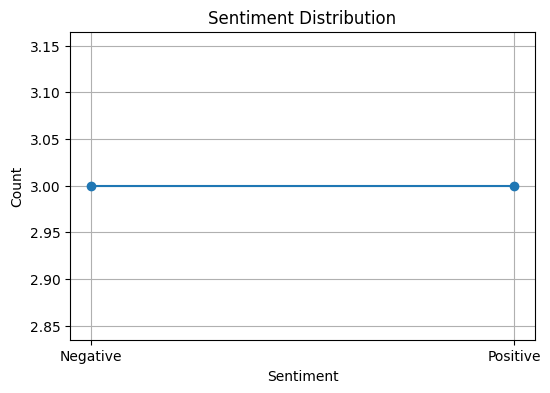

In [19]:
sentiment_counts = df['sentiment'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.plot(['Negative', 'Positive'], sentiment_counts, marker='o')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 4. Bar Chart

Now, let's visualize the sentiment distribution using a bar chart.

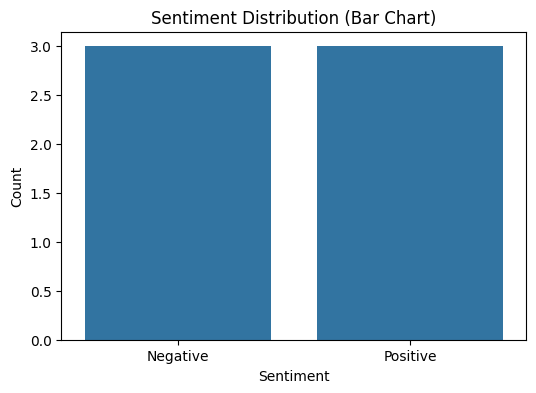

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Negative', 'Positive'], y=sentiment_counts.values)
plt.title('Sentiment Distribution (Bar Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 5. Scatter Plot

Let's create a scatter plot to visualize the length of each review versus its sentiment.

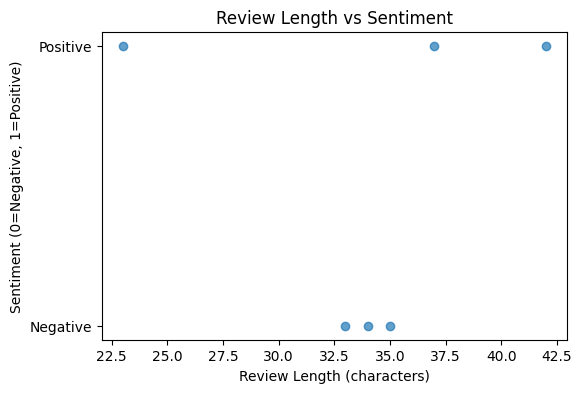

In [21]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(6,4))
plt.scatter(df['review_length'], df['sentiment'], alpha=0.7)
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Sentiment (0=Negative, 1=Positive)')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [22]:
# Text Preprocessing: Noise Removal and Normalization
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(preprocess_text)
df[['review', 'clean_review']].head()

,review,clean_review
0,"I loved this movie, it was fantastic!",loved movie fantastic
1,Absolutely terrible. Waste of time.,absolutely terrible waste time
2,"A wonderful experience, would watch again.",wonderful experience watch
3,Not my cup of tea. Pretty boring.,cup tea pretty boring
4,Great acting and story!,great acting story


## 6. Feature Extraction, Model Training, and Evaluation

Now, let's split the data, extract features, train a Naive Bayes classifier, and evaluate its performance.

In [23]:
# Use the cleaned reviews for modeling
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred, zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[1 0]
 [1 0]]


## 7. Predict Sentiment for New Reviews

Let's use the trained model to predict the sentiment of new, unseen movie reviews.

In [24]:
# Example new reviews
new_reviews = [
    "This movie was a fantastic experience!",
    "I didn't like the film, it was boring.",
    "The acting was great but the story was weak.",
    "Absolutely loved the visuals and music!"
]

# Transform and predict
new_reviews_vec = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_vec)

for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: "{review}"')
    print(f'Predicted Sentiment: {"Positive" if sentiment == 1 else "Negative"}\n')

Review: "This movie was a fantastic experience!"
Predicted Sentiment: Positive

Review: "I didn't like the film, it was boring."
Predicted Sentiment: Negative

Review: "The acting was great but the story was weak."
Predicted Sentiment: Positive

Review: "Absolutely loved the visuals and music!"
Predicted Sentiment: Negative



# Project Summary: Sentiment Analysis on Movie Reviews

**Objective:**
Build a machine learning model to classify movie reviews as positive or negative using natural language processing (NLP) techniques and data visualization.

**Key Skills Demonstrated:**
- Data preprocessing and feature engineering
- Exploratory data analysis and visualization (Matplotlib, Seaborn)
- Text vectorization (Bag-of-Words)
- Model training and evaluation (Naive Bayes)
- Python, pandas, scikit-learn, matplotlib, seaborn

**Project Impact:**
This project showcases the ability to apply NLP and machine learning to real-world text data, providing actionable insights into customer sentiment for the entertainment industry.

---